In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

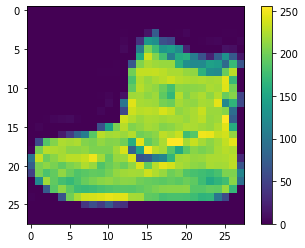

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

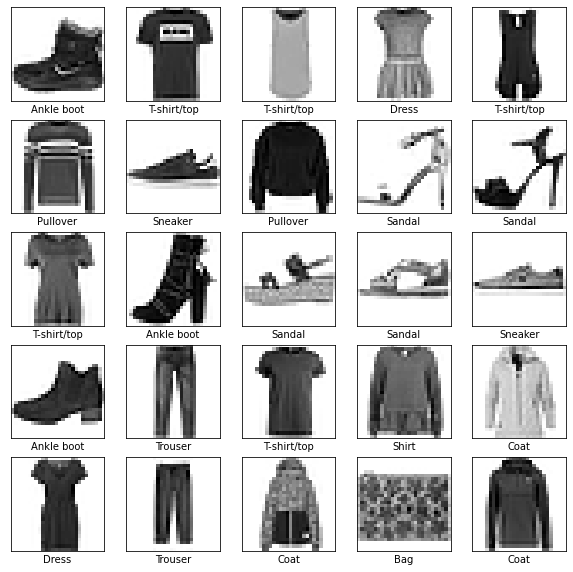

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5006 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3335 - accuracy: 0.8855 - 563ms/epoch - 2ms/step

Test accuracy: 0.8855000138282776


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [22]:
predictions[0]

array([6.04334957e-07, 3.09635695e-08, 2.14527471e-08, 2.39485711e-08,
       6.02298700e-09, 4.25061118e-03, 1.00820525e-05, 9.96219087e-03,
       1.92236848e-06, 9.85774517e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

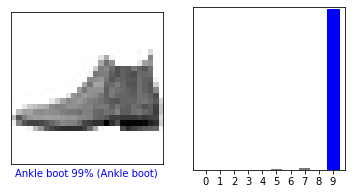

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

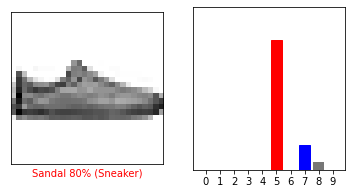

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

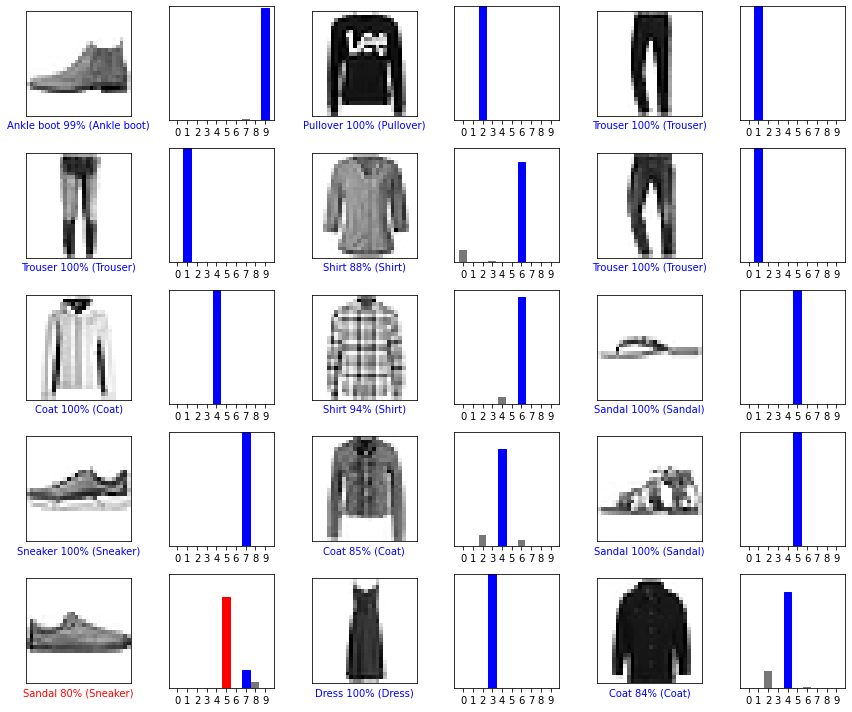

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[3.0824376e-07 2.4192903e-14 9.9950171e-01 2.7425935e-09 2.6126488e-04
  1.0329182e-15 2.3677151e-04 3.5920587e-16 9.3589747e-10 4.2213536e-16]]


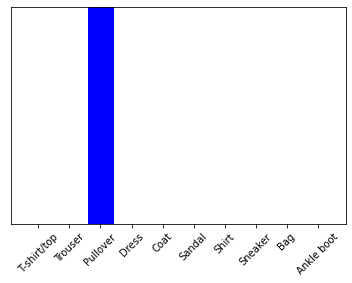

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

2